**Library Imports**:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.cluster import DBSCAN

In [2]:
#set panda options to max display to view all columns:
pd.options.display.max_columns = None

**Data Imports:** Let's read in the socioeconomic determinants data along with the corresponding rolling aggregates for year end covid statistics:

In [3]:
df = pd.read_csv('data/Socioeconomic Data/Socioeconomic determinants/socioeconomic determinant for state.csv')
df_2 = pd.read_csv('data/csse_covid_19_daily_reports_us/12-31-2020.csv')

In [109]:
#familiarize ourselves with each respective dataframes with .head(), also print out df shape to see how we'd like to merge
print(df.shape)
df.head()

(51, 26)


,FIPS,Name,Postal Code,Area size,Population size,Population density,Senior Population,Young Population,Male Population,White Population,Africa-American Population,Hispanic population,Internet access,High school degree,Bachelor degrees,Median household income,Poverty rate,Uninsured,Household size,House Owner,hospital,hospital bed,ICU bed,ventilator usage,Nurses,Medical Doctors
0,1,Alabama,AL,135767,4903185,36.114704,17.4,18.3,48.3,69.5,27.8,4.5,81.9,12.9,16.3,51734,15.5,9.7,2.60,68.8,119,18611,1637,383,85746,43429
1,2,Alaska,AK,1723337,731545,0.424493,12.4,21.0,52.0,71.4,4.7,7.2,88.0,6.4,18.5,75463,10.1,12.2,2.90,64.7,28,1832,193,41,15487,18418
2,4,Arizona,AZ,295234,7278717,24.654061,18.0,18.7,49.7,81.7,6.0,31.7,87.4,12.4,18.8,62055,13.5,11.3,2.71,65.3,125,18388,1882,427,93928,84130
3,5,Arkansas,AR,137732,3017804,21.910696,17.4,19.2,48.9,79.3,16.7,7.7,80.1,12.5,15.1,48952,16.2,9.1,2.59,65.5,105,12473,914,261,42487,47343
4,6,California,CA,423967,39512223,93.196459,14.8,18.7,49.7,63.6,7.0,39.4,90.0,16.0,21.9,80440,11.8,7.7,3.02,54.9,461,80893,8652,1986,444964,588052


In [110]:
#same as above for our second dataframe:
print(df_2.shape)
df_2

(58, 18)


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2021-01-01 05:30:27,32.3182,-86.9023,361226,4827,202137.0,154262.0,1.0,7367.170523,1874000.0,NaN,1.336283,84000001.0,USA,38220.054923,NaN
1,Alaska,US,2021-01-01 05:30:27,61.3707,-152.4044,46986,206,7165.0,39615.0,2.0,6422.844801,1275750.0,NaN,0.438428,84000002.0,USA,174391.185778,NaN
2,American Samoa,US,2021-01-01 05:30:27,-14.2710,-170.1320,0,0,NaN,0.0,60.0,0.000000,2140.0,NaN,NaN,16.0,ASM,3846.084722,NaN
3,Arizona,US,2021-01-01 05:30:27,33.7298,-111.4312,520207,8864,75981.0,435362.0,4.0,7146.960103,2834752.0,NaN,1.703937,84000004.0,USA,38945.764755,NaN
4,Arkansas,US,2021-01-01 05:30:27,34.9697,-92.3731,225138,3676,199247.0,22215.0,5.0,7460.325455,2051488.0,NaN,1.632776,84000005.0,USA,67979.497674,NaN
5,California,US,2021-01-01 05:30:27,36.1162,-119.6816,2325599,25986,NaN,2265110.0,6.0,5798.223502,32855482.0,NaN,1.130376,84000006.0,USA,83152.704418,NaN
6,Colorado,US,2021-01-01 05:30:27,39.0598,-105.3111,334097,4814,17971.0,311312.0,8.0,5801.568261,4406667.0,NaN,1.440899,84000008.0,USA,76521.427619,NaN
7,Connecticut,US,2021-01-01 05:30:27,41.5978,-72.7554,185708,5995,9800.0,169913.0,9.0,5208.781229,4320693.0,NaN,3.228186,84000009.0,USA,121187.803394,NaN
8,Delaware,US,2021-01-01 05:30:27,39.3185,-75.5071,57456,1014,18851.0,37679.0,10.0,5900.402972,978204.0,NaN,1.611668,84000010.0,USA,100455.962636,NaN
9,Diamond Princess,US,2021-01-01 05:30:27,NaN,NaN,49,0,NaN,49.0,88888.0,NaN,NaN,NaN,0.000000,84088888.0,USA,NaN,NaN


In [6]:
dmf=df.merge(df_2, left_on='Name', right_on='Province_State')
dmf.drop(columns = ['People_Hospitalized', 'Hospitalization_Rate'], inplace=True)
dmf['Recovered'] = dmf['Confirmed'] - dmf['Deaths'] - dmf['Active']
dmf['deaths_per_population'] = dmf['Deaths'] / dmf['Population size']
dmf['recovered_per_population'] = dmf['Recovered'] / dmf['Population size']
dmf['confirmed_per_population'] = dmf['Confirmed'] / dmf['Population size']
dmf['active_per_population'] = dmf['Active'] / dmf['Population size']
dmf.head()


,FIPS_x,Name,Postal Code,Area size,Population size,Population density,Senior Population,Young Population,Male Population,White Population,Africa-American Population,Hispanic population,Internet access,High school degree,Bachelor degrees,Median household income,Poverty rate,Uninsured,Household size,House Owner,hospital,hospital bed,ICU bed,ventilator usage,Nurses,Medical Doctors,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS_y,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,deaths_per_population,recovered_per_population,confirmed_per_population,active_per_population
0,1,Alabama,AL,135767,4903185,36.114704,17.4,18.3,48.3,69.5,27.8,4.5,81.9,12.9,16.3,51734,15.5,9.7,2.60,68.8,119,18611,1637,383,85746,43429,Alabama,US,2021-01-01 05:30:27,32.3182,-86.9023,361226,4827,202137.0,154262.0,1.0,7367.170523,1874000.0,1.336283,84000001.0,USA,38220.054923,0.000984,0.041226,0.073672,0.031462
1,2,Alaska,AK,1723337,731545,0.424493,12.4,21.0,52.0,71.4,4.7,7.2,88.0,6.4,18.5,75463,10.1,12.2,2.90,64.7,28,1832,193,41,15487,18418,Alaska,US,2021-01-01 05:30:27,61.3707,-152.4044,46986,206,7165.0,39615.0,2.0,6422.844801,1275750.0,0.438428,84000002.0,USA,174391.185778,0.000282,0.009794,0.064228,0.054153
2,4,Arizona,AZ,295234,7278717,24.654061,18.0,18.7,49.7,81.7,6.0,31.7,87.4,12.4,18.8,62055,13.5,11.3,2.71,65.3,125,18388,1882,427,93928,84130,Arizona,US,2021-01-01 05:30:27,33.7298,-111.4312,520207,8864,75981.0,435362.0,4.0,7146.960103,2834752.0,1.703937,84000004.0,USA,38945.764755,0.001218,0.010439,0.071470,0.059813
3,5,Arkansas,AR,137732,3017804,21.910696,17.4,19.2,48.9,79.3,16.7,7.7,80.1,12.5,15.1,48952,16.2,9.1,2.59,65.5,105,12473,914,261,42487,47343,Arkansas,US,2021-01-01 05:30:27,34.9697,-92.3731,225138,3676,199247.0,22215.0,5.0,7460.325455,2051488.0,1.632776,84000005.0,USA,67979.497674,0.001218,0.066024,0.074603,0.007361
4,6,California,CA,423967,39512223,93.196459,14.8,18.7,49.7,63.6,7.0,39.4,90.0,16.0,21.9,80440,11.8,7.7,3.02,54.9,461,80893,8652,1986,444964,588052,California,US,2021-01-01 05:30:27,36.1162,-119.6816,2325599,25986,34503.0,2265110.0,6.0,5798.223502,32855482.0,1.130376,84000006.0,USA,83152.704418,0.000658,0.000873,0.058858,0.057327


<AxesSubplot:>

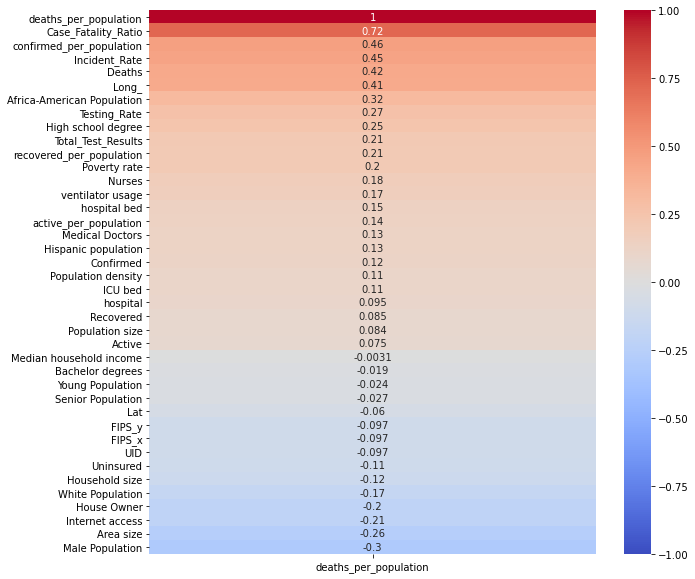

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(dmf.corr()[['deaths_per_population']].sort_values('deaths_per_population', ascending = False),
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1)

<AxesSubplot:>

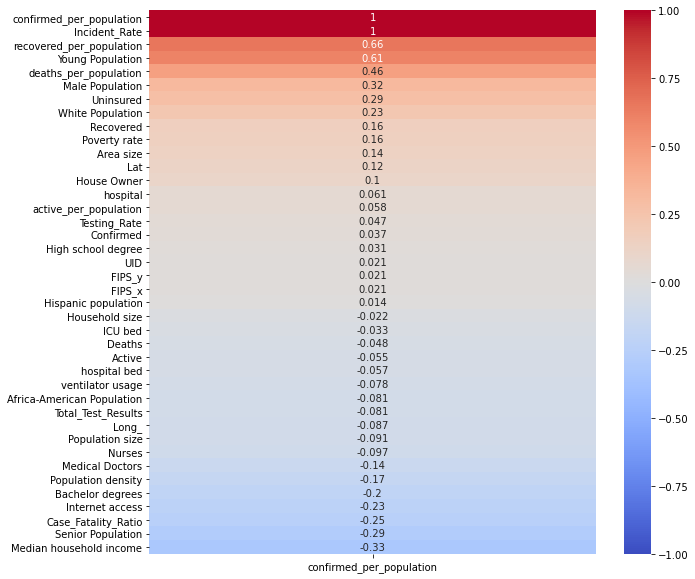

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(dmf.corr()[['confirmed_per_population']].sort_values('confirmed_per_population', ascending = False),
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1)

<AxesSubplot:>

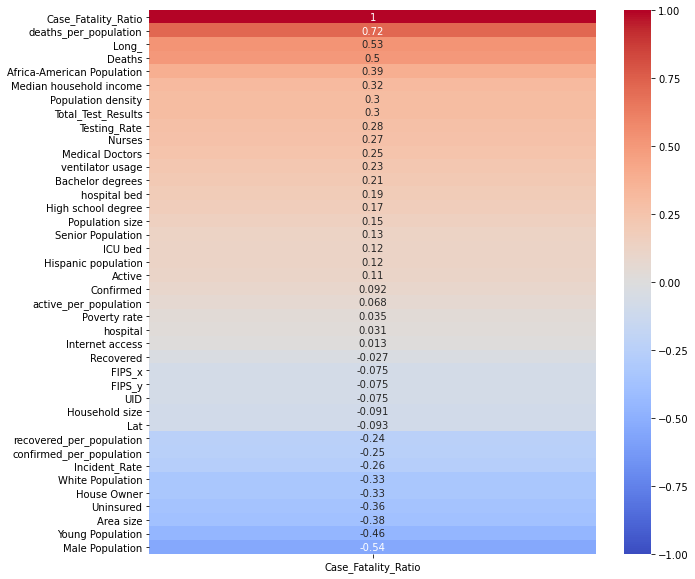

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(dmf.corr()[['Case_Fatality_Ratio']].sort_values('Case_Fatality_Ratio', ascending = False),
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1)

<AxesSubplot:>

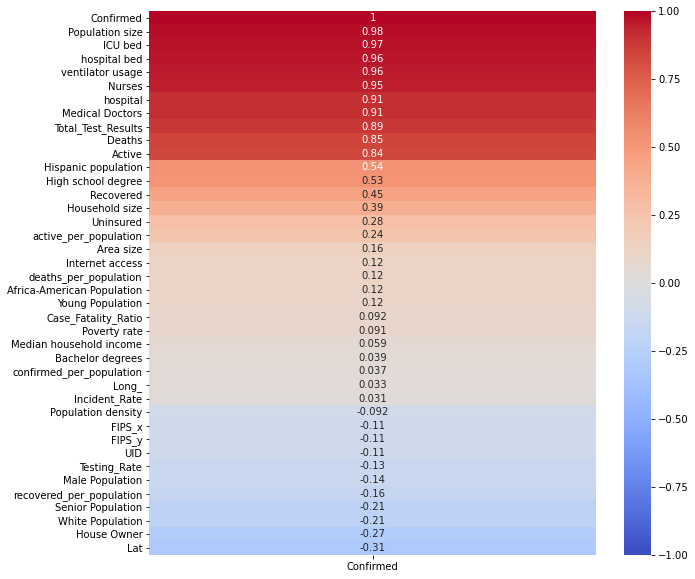

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(dmf.corr()[['Confirmed']].sort_values('Confirmed', ascending = False),
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1)

<AxesSubplot:>

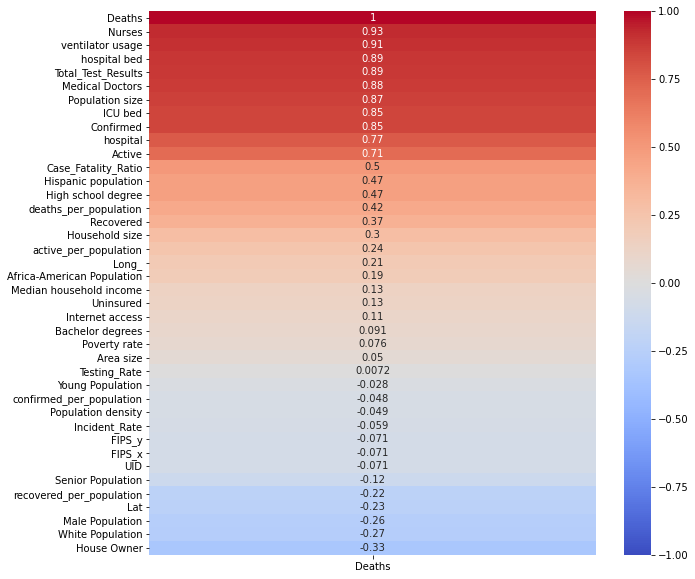

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(dmf.corr()[['Deaths']].sort_values('Deaths', ascending = False),
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1)

In [12]:
features = ['Population size', 'hospital', 'White Population', 'Africa-American Population',
       'Hispanic population', 'Household size']
X = dmf[features]
y = dmf['Deaths']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [14]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [15]:
lr = LinearRegression()
lr.fit(X_train_sc, y_train)
print(lr.score(X_train_sc, y_train))
print(lr.score(X_test_sc, y_test))

0.7785810000383033
0.6612385301510577


In [16]:
lr = LinearRegression()
lr.fit(X_train_sc, y_train)
print(lr.score(X_train_sc, y_train))
print(lr.score(X_test_sc, y_test))

0.7785810000383033
0.6612385301510577


In [17]:
lr.coef_

array([7547.91564615, -291.65234582,  167.23365373,  750.92398243,
        335.79948088, -342.17909228])

In [18]:
features = ['Case_Fatality_Ratio','Median household income', 'Poverty rate', 'White Population', 'Africa-American Population',
       'Hispanic population']
X = dmf[features]
y = dmf['deaths_per_population']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [19]:
lr = LinearRegression()
lr.fit(X_train_sc, y_train)
print(lr.score(X_train_sc, y_train))
print(lr.score(X_test_sc, y_test))

0.6437203470250359
0.4184482084376405


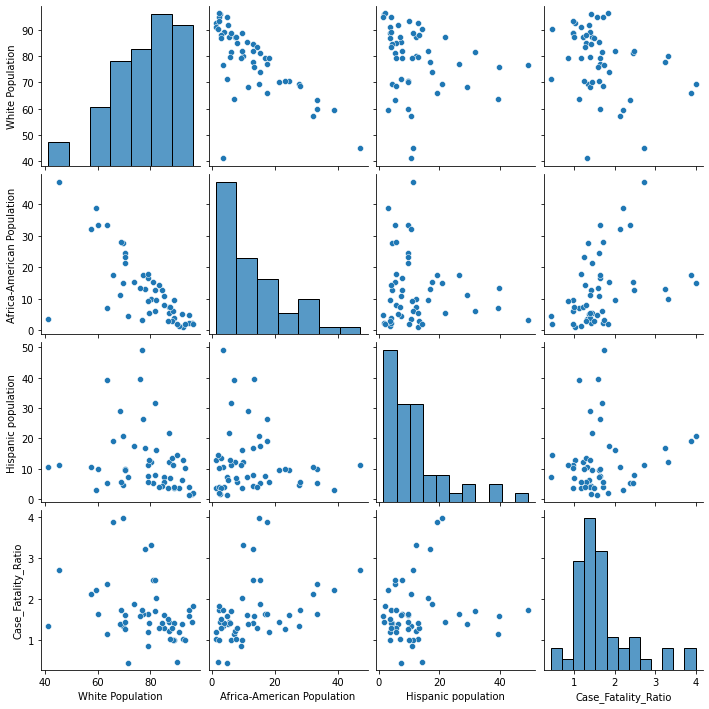

In [20]:
sns.pairplot(dmf[[ 'White Population', 'Africa-American Population',
       'Hispanic population', 'Case_Fatality_Ratio']])

In [21]:
dmf.sort_values('deaths_per_population', ascending = False)

,FIPS_x,Name,Postal Code,Area size,Population size,Population density,Senior Population,Young Population,Male Population,White Population,Africa-American Population,Hispanic population,Internet access,High school degree,Bachelor degrees,Median household income,Poverty rate,Uninsured,Household size,House Owner,hospital,hospital bed,ICU bed,ventilator usage,Nurses,Medical Doctors,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS_y,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,deaths_per_population,recovered_per_population,confirmed_per_population,active_per_population
30,34,New Jersey,NJ,22591,8882190,393.173830,16.6,18.0,48.9,69.5,15.1,20.9,89.5,9.7,25.1,85751,9.2,7.9,2.77,63.3,98,26385,1758,745,133029,113962,New Jersey,US,2021-01-01 05:30:27,40.2989,-74.5210,529027,19042,107337.0,402648.0,34.0,5374.350245,7735775.0,3.989023,84000034.0,USA,87093.104291,0.002144,0.012085,0.059560,0.045332
32,36,New York,NY,141297,19453561,137.678514,16.9,17.2,48.6,65.8,17.6,19.3,86.5,12.4,21.2,72108,13.0,5.2,2.71,53.5,224,54743,4230,1357,358901,407769,New York,US,2021-01-01 05:30:27,42.1657,-74.9481,978783,37983,102129.0,838671.0,36.0,5031.382172,25285060.0,3.880635,84000036.0,USA,129976.511755,0.001952,0.005250,0.050314,0.043111
21,25,Massachusetts,MA,27336,6892503,252.140145,17.0,16.1,48.5,80.2,9.9,12.4,89.1,8.7,24.7,85843,9.4,3.0,2.68,62.2,105,20056,1986,492,138481,155292,Massachusetts,US,2021-01-01 05:30:27,42.2302,-71.5301,375178,12423,261672.0,101083.0,25.0,5443.276557,10944699.0,3.311228,84000025.0,USA,158791.356348,0.001802,0.037965,0.054433,0.014666
34,38,North Dakota,ND,183108,762062,4.161817,15.8,19.6,51.0,89.0,3.9,4.0,84.4,6.5,21.5,64577,10.6,6.9,2.49,61.3,53,3317,516,66,16046,12751,North Dakota,US,2021-01-01 05:30:27,47.5289,-99.7840,92495,1299,89307.0,1889.0,38.0,12137.463881,1277930.0,1.396832,84000038.0,USA,167693.704712,0.001705,0.117191,0.121375,0.002479
41,46,South Dakota,SD,199729,884659,4.429297,17.4,20.5,50.8,86.7,3.0,3.7,85.2,7.9,20.6,59533,11.9,10.2,2.54,67.8,63,3232,392,90,18473,11874,South Dakota,US,2021-01-01 05:30:27,44.2998,-99.4388,99164,1488,91980.0,5696.0,46.0,11209.290811,372640.0,1.500545,84000046.0,USA,42122.444919,0.001682,0.103972,0.112093,0.006439
6,9,Connecticut,CT,14357,3565287,248.330919,17.6,16.6,48.9,77.8,13.2,16.9,88.8,9.3,22.0,78833,10.0,5.9,2.65,65.0,46,8123,966,193,67924,58009,Connecticut,US,2021-01-01 05:30:27,41.5978,-72.7554,185708,5995,9800.0,169913.0,9.0,5208.781229,4320693.0,3.228186,84000009.0,USA,121187.803394,0.001681,0.002749,0.052088,0.047658
39,44,Rhode Island,RI,4001,1059361,264.774056,17.7,15.7,48.8,82.0,9.6,16.3,87.8,10.7,20.9,71169,10.8,4.1,2.69,61.7,15,3413,375,64,25014,18028,Rhode Island,US,2021-01-01 05:30:27,41.6809,-71.5118,87949,1777,5381.0,80791.0,44.0,8302.080216,1974498.0,2.020489,84000044.0,USA,186385.755186,0.001677,0.005079,0.083021,0.076264
18,22,Louisiana,LA,135659,4648794,34.268231,16.0,19.5,48.8,63.5,33.4,5.4,80.7,14.0,16.0,51073,19.0,8.9,2.67,66.5,215,21055,2212,463,69699,63967,Louisiana,US,2021-01-01 05:30:27,31.1695,-91.8678,315275,7488,263712.0,44075.0,22.0,6781.866437,4214182.0,2.375069,84000022.0,USA,90651.080689,0.001611,0.056727,0.067819,0.009481
24,28,Mississippi,MS,125438,2976149,23.726056,16.4,19.5,48.2,59.4,38.9,3.0,77.0,14.7,13.7,45792,19.6,13.0,2.67,67.3,114,15148,1069,307,50103,28705,Mississippi,US,2021-01-01 05:30:27,32.7416,-89.6787,215811,4787,167263.0,43761.0,28.0,7251.350655,1343469.0,2.218145,84000028.0,USA,45141.187488,0.001608,0.056201,0.072514,0.014704
13,17,Illinois,IL,149995,12671821,84.481623,16.1,18.3,49.1,73.8,15.4,17.5,86.2,10.2,21.7,69187,11.5,7.4,2.70,66.0,214,37883,3743,929,207001,170660,Illinois,US,2021-01-01 05:30:27,40.3495,-88.9861,963389,17978,0.0,945411.0,17.0,7602.608970,13277443.0,1.866121,84000017.0,USA,104779.281526,0.001419,0.000000,0.076026,0.074607


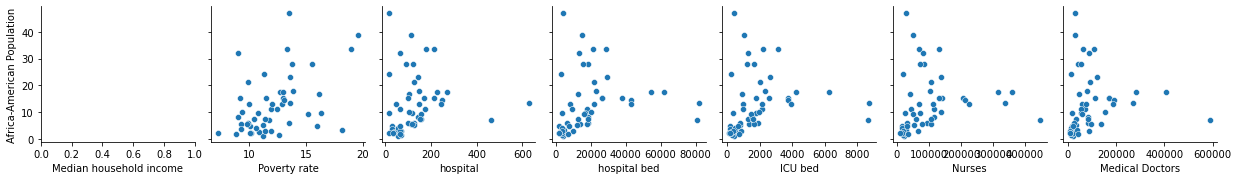

In [22]:
sns.pairplot(data=dmf,
                  y_vars=['Africa-American Population'],
                  x_vars=['Median household income', 'Poverty rate', 'hospital',
       'hospital bed', 'ICU bed', 'Nurses',
       'Medical Doctors'])

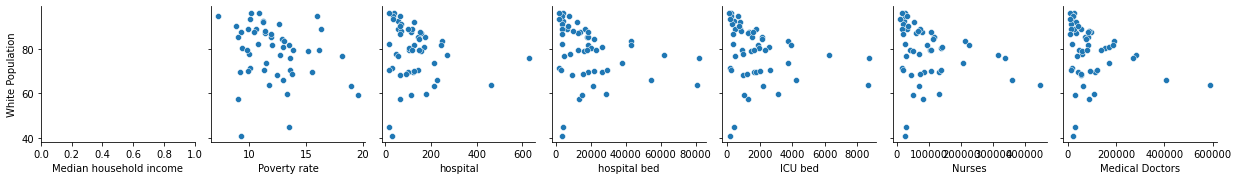

In [23]:
sns.pairplot(data=dmf,
                  y_vars=['White Population'],
                  x_vars=['Median household income', 'Poverty rate', 'hospital',
       'hospital bed', 'ICU bed', 'Nurses',
       'Medical Doctors'])

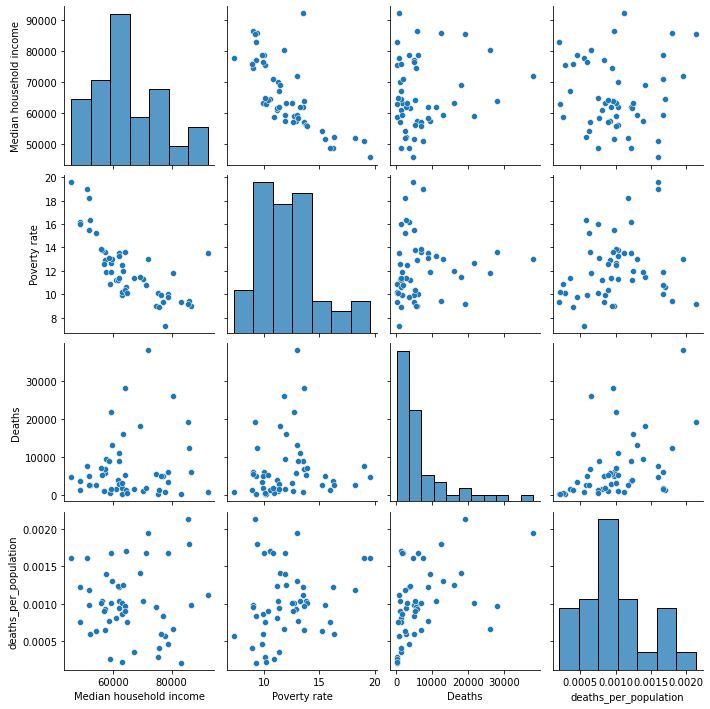

In [24]:
sns.pairplot(dmf[[ 'Median household income', 'Poverty rate', 'Deaths', 'deaths_per_population']])

In [105]:
dmf['Case_Fatality_Ratio'].describe()

count    51.000000
mean      1.660667
std       0.738485
min       0.438428
25%       1.265137
50%       1.440899
75%       1.784340
max       3.989023
Name: Case_Fatality_Ratio, dtype: float64

In [25]:
dmf['Case_Fatality_Ratio'].sort_values(ascending=False) #2.0

30    3.989023
32    3.880635
21    3.311228
6     3.228186
8     2.711935
38    2.470909
22    2.462634
18    2.375069
24    2.218145
20    2.130759
39    2.020489
13    1.866121
45    1.834862
31    1.733817
29    1.723903
40    1.722237
2     1.703937
10    1.640628
9     1.637781
3     1.632776
14    1.615492
7     1.611668
43    1.582058
48    1.567957
41    1.500545
5     1.440899
46    1.439425
19    1.433825
25    1.411485
47    1.402623
34    1.396832
28    1.389216
15    1.381198
0     1.336283
11    1.324442
37    1.296649
23    1.295924
35    1.279591
33    1.250683
16    1.213627
26    1.178346
42    1.177058
4     1.130376
12    1.017884
49    1.007229
27    0.989820
17    0.988837
50    0.986287
36    0.855515
44    0.458765
1     0.438428
Name: Case_Fatality_Ratio, dtype: float64

In [106]:
dmf['top_25_cfr']=(dmf['Case_Fatality_Ratio'] > 1.784340).astype(int)

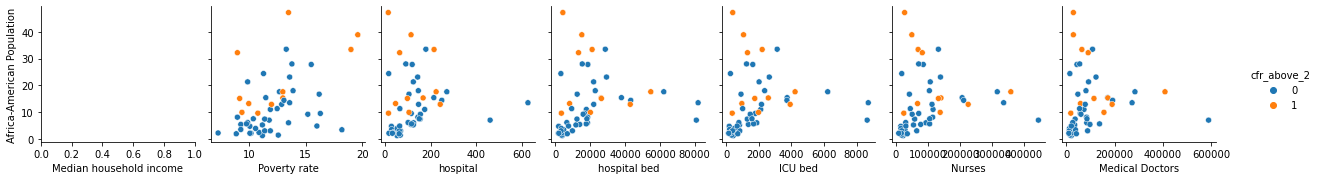

In [27]:
sns.pairplot(data=dmf,
                  y_vars=['Africa-American Population'],
                  x_vars=['Median household income', 'Poverty rate', 'hospital',
       'hospital bed', 'ICU bed', 'Nurses',
       'Medical Doctors'], hue='top_25_cfr')

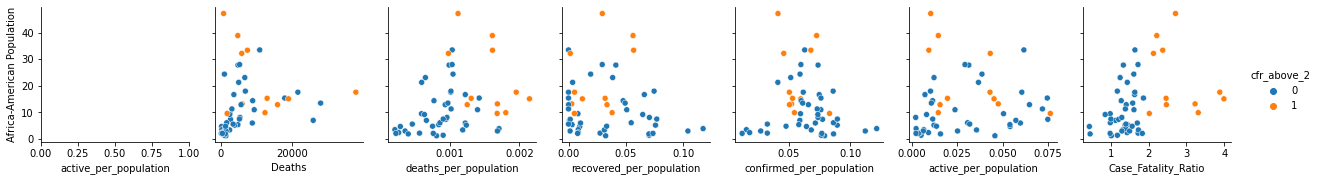

In [28]:
sns.pairplot(data=dmf,
                  y_vars=['Africa-American Population'],
                  x_vars=['active_per_population','Deaths','deaths_per_population',
       'recovered_per_population', 'confirmed_per_population',
       'active_per_population', 'Case_Fatality_Ratio'], hue='top_25_cfr')

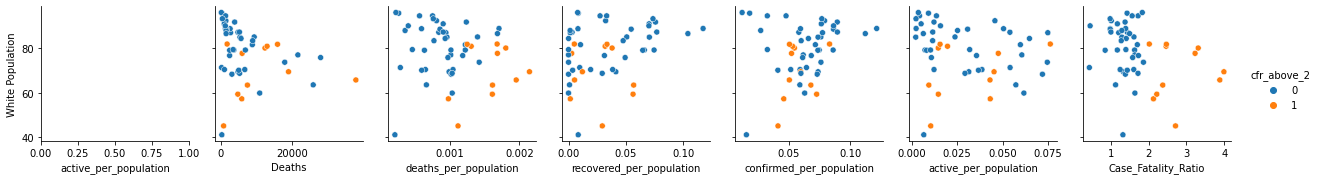

In [29]:
sns.pairplot(data=dmf,
                  y_vars=['White Population'],
                  x_vars=['active_per_population','Deaths','deaths_per_population',
       'recovered_per_population', 'confirmed_per_population',
       'active_per_population', 'Case_Fatality_Ratio'], hue='top_25_cfr')

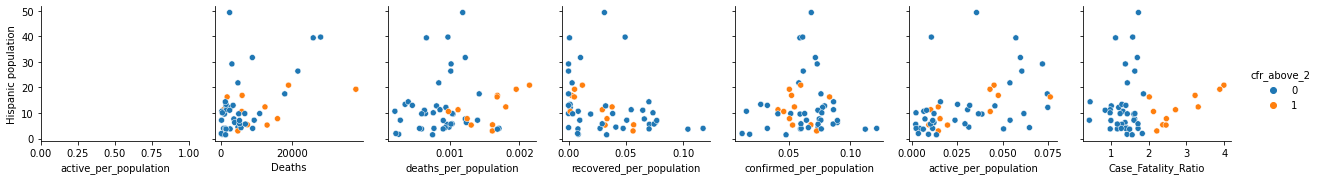

In [30]:
sns.pairplot(data=dmf,
                  y_vars=['Hispanic population'],
                  x_vars=['active_per_population','Deaths','deaths_per_population',
       'recovered_per_population', 'confirmed_per_population',
       'active_per_population', 'Case_Fatality_Ratio'], hue='top_25_cfr')

In [31]:
bleh=pd.DataFrame(dmf[['Median household income', 'Poverty rate', 'hospital',
       'hospital bed', 'ICU bed', 'Nurses', 'White Population', 'Africa-American Population',
       'Hispanic population', 'Case_Fatality_Ratio', 'top_25_cfr']])

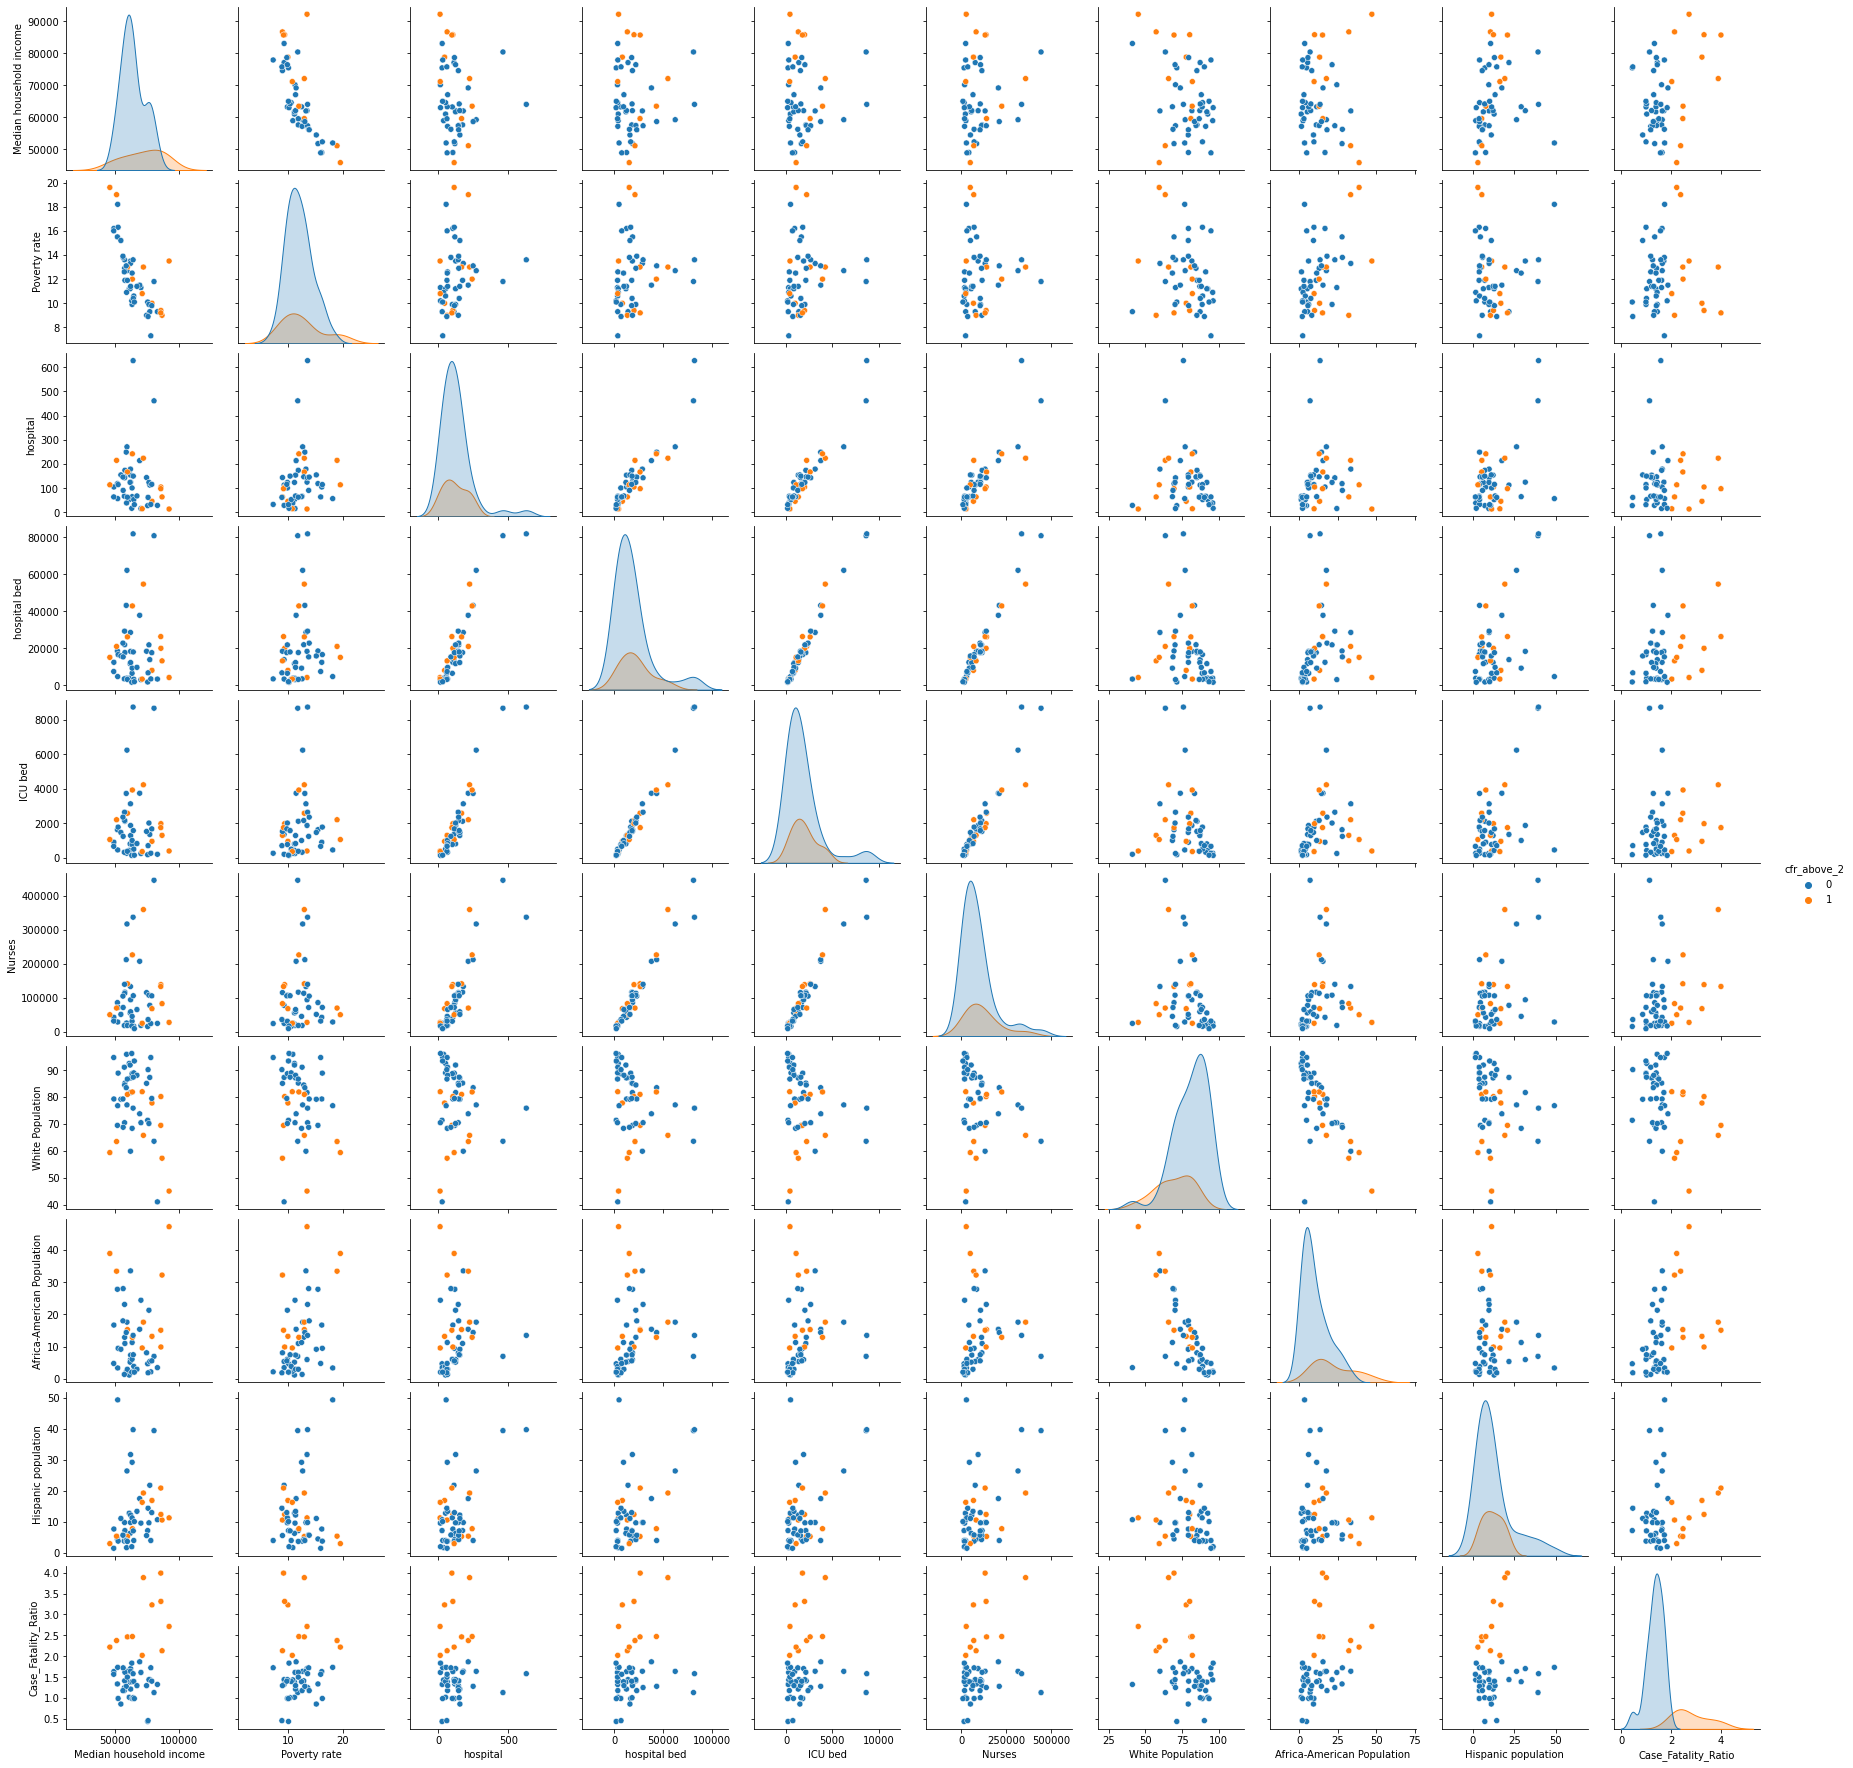

In [32]:
sns.pairplot(bleh, hue='top_25_cfr');

In [33]:
blah=pd.DataFrame(dmf[['Median household income', 'Poverty rate', 'hospital', 
                       'White Population', 'Africa-American Population',
                       'Hispanic population', 'Deaths',
                       'Case_Fatality_Ratio', 'deaths_per_population',
                      'confirmed_per_population', 'Population size']])

In [34]:
dmf.head()

,FIPS_x,Name,Postal Code,Area size,Population size,Population density,Senior Population,Young Population,Male Population,White Population,Africa-American Population,Hispanic population,Internet access,High school degree,Bachelor degrees,Median household income,Poverty rate,Uninsured,Household size,House Owner,hospital,hospital bed,ICU bed,ventilator usage,Nurses,Medical Doctors,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS_y,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,deaths_per_population,recovered_per_population,confirmed_per_population,active_per_population,cfr_above_2
0,1,Alabama,AL,135767,4903185,36.114704,17.4,18.3,48.3,69.5,27.8,4.5,81.9,12.9,16.3,51734,15.5,9.7,2.60,68.8,119,18611,1637,383,85746,43429,Alabama,US,2021-01-01 05:30:27,32.3182,-86.9023,361226,4827,202137.0,154262.0,1.0,7367.170523,1874000.0,1.336283,84000001.0,USA,38220.054923,0.000984,0.041226,0.073672,0.031462,0
1,2,Alaska,AK,1723337,731545,0.424493,12.4,21.0,52.0,71.4,4.7,7.2,88.0,6.4,18.5,75463,10.1,12.2,2.90,64.7,28,1832,193,41,15487,18418,Alaska,US,2021-01-01 05:30:27,61.3707,-152.4044,46986,206,7165.0,39615.0,2.0,6422.844801,1275750.0,0.438428,84000002.0,USA,174391.185778,0.000282,0.009794,0.064228,0.054153,0
2,4,Arizona,AZ,295234,7278717,24.654061,18.0,18.7,49.7,81.7,6.0,31.7,87.4,12.4,18.8,62055,13.5,11.3,2.71,65.3,125,18388,1882,427,93928,84130,Arizona,US,2021-01-01 05:30:27,33.7298,-111.4312,520207,8864,75981.0,435362.0,4.0,7146.960103,2834752.0,1.703937,84000004.0,USA,38945.764755,0.001218,0.010439,0.071470,0.059813,0
3,5,Arkansas,AR,137732,3017804,21.910696,17.4,19.2,48.9,79.3,16.7,7.7,80.1,12.5,15.1,48952,16.2,9.1,2.59,65.5,105,12473,914,261,42487,47343,Arkansas,US,2021-01-01 05:30:27,34.9697,-92.3731,225138,3676,199247.0,22215.0,5.0,7460.325455,2051488.0,1.632776,84000005.0,USA,67979.497674,0.001218,0.066024,0.074603,0.007361,0
4,6,California,CA,423967,39512223,93.196459,14.8,18.7,49.7,63.6,7.0,39.4,90.0,16.0,21.9,80440,11.8,7.7,3.02,54.9,461,80893,8652,1986,444964,588052,California,US,2021-01-01 05:30:27,36.1162,-119.6816,2325599,25986,34503.0,2265110.0,6.0,5798.223502,32855482.0,1.130376,84000006.0,USA,83152.704418,0.000658,0.000873,0.058858,0.057327,0


In [35]:
ss = StandardScaler()
X_blah = ss.fit_transform(blah)

In [100]:
dbscan = DBSCAN(eps=2.1, min_samples=3)

In [101]:
dbscan.fit(X_blah)

DBSCAN(eps=2.1, min_samples=3)

In [102]:
blah['cluster'] = dbscan.labels_

In [103]:
blah.groupby('cluster').mean().T.drop(columns=-1)

cluster,0,1
Median household income,6.263212e+04,8.347567e+04
Poverty rate,1.200882e+01,9.533333e+00
hospital,1.127647e+02,8.300000e+01
White Population,8.300588e+01,7.583333e+01
Africa-American Population,1.085882e+01,1.273333e+01
Hispanic population,8.102941e+00,1.673333e+01
Deaths,4.650206e+03,1.248667e+04
Case_Fatality_Ratio,1.370678e+00,3.509479e+00
deaths_per_population,8.849194e-04,1.875908e-03
confirmed_per_population,6.614094e-02,5.536033e-02


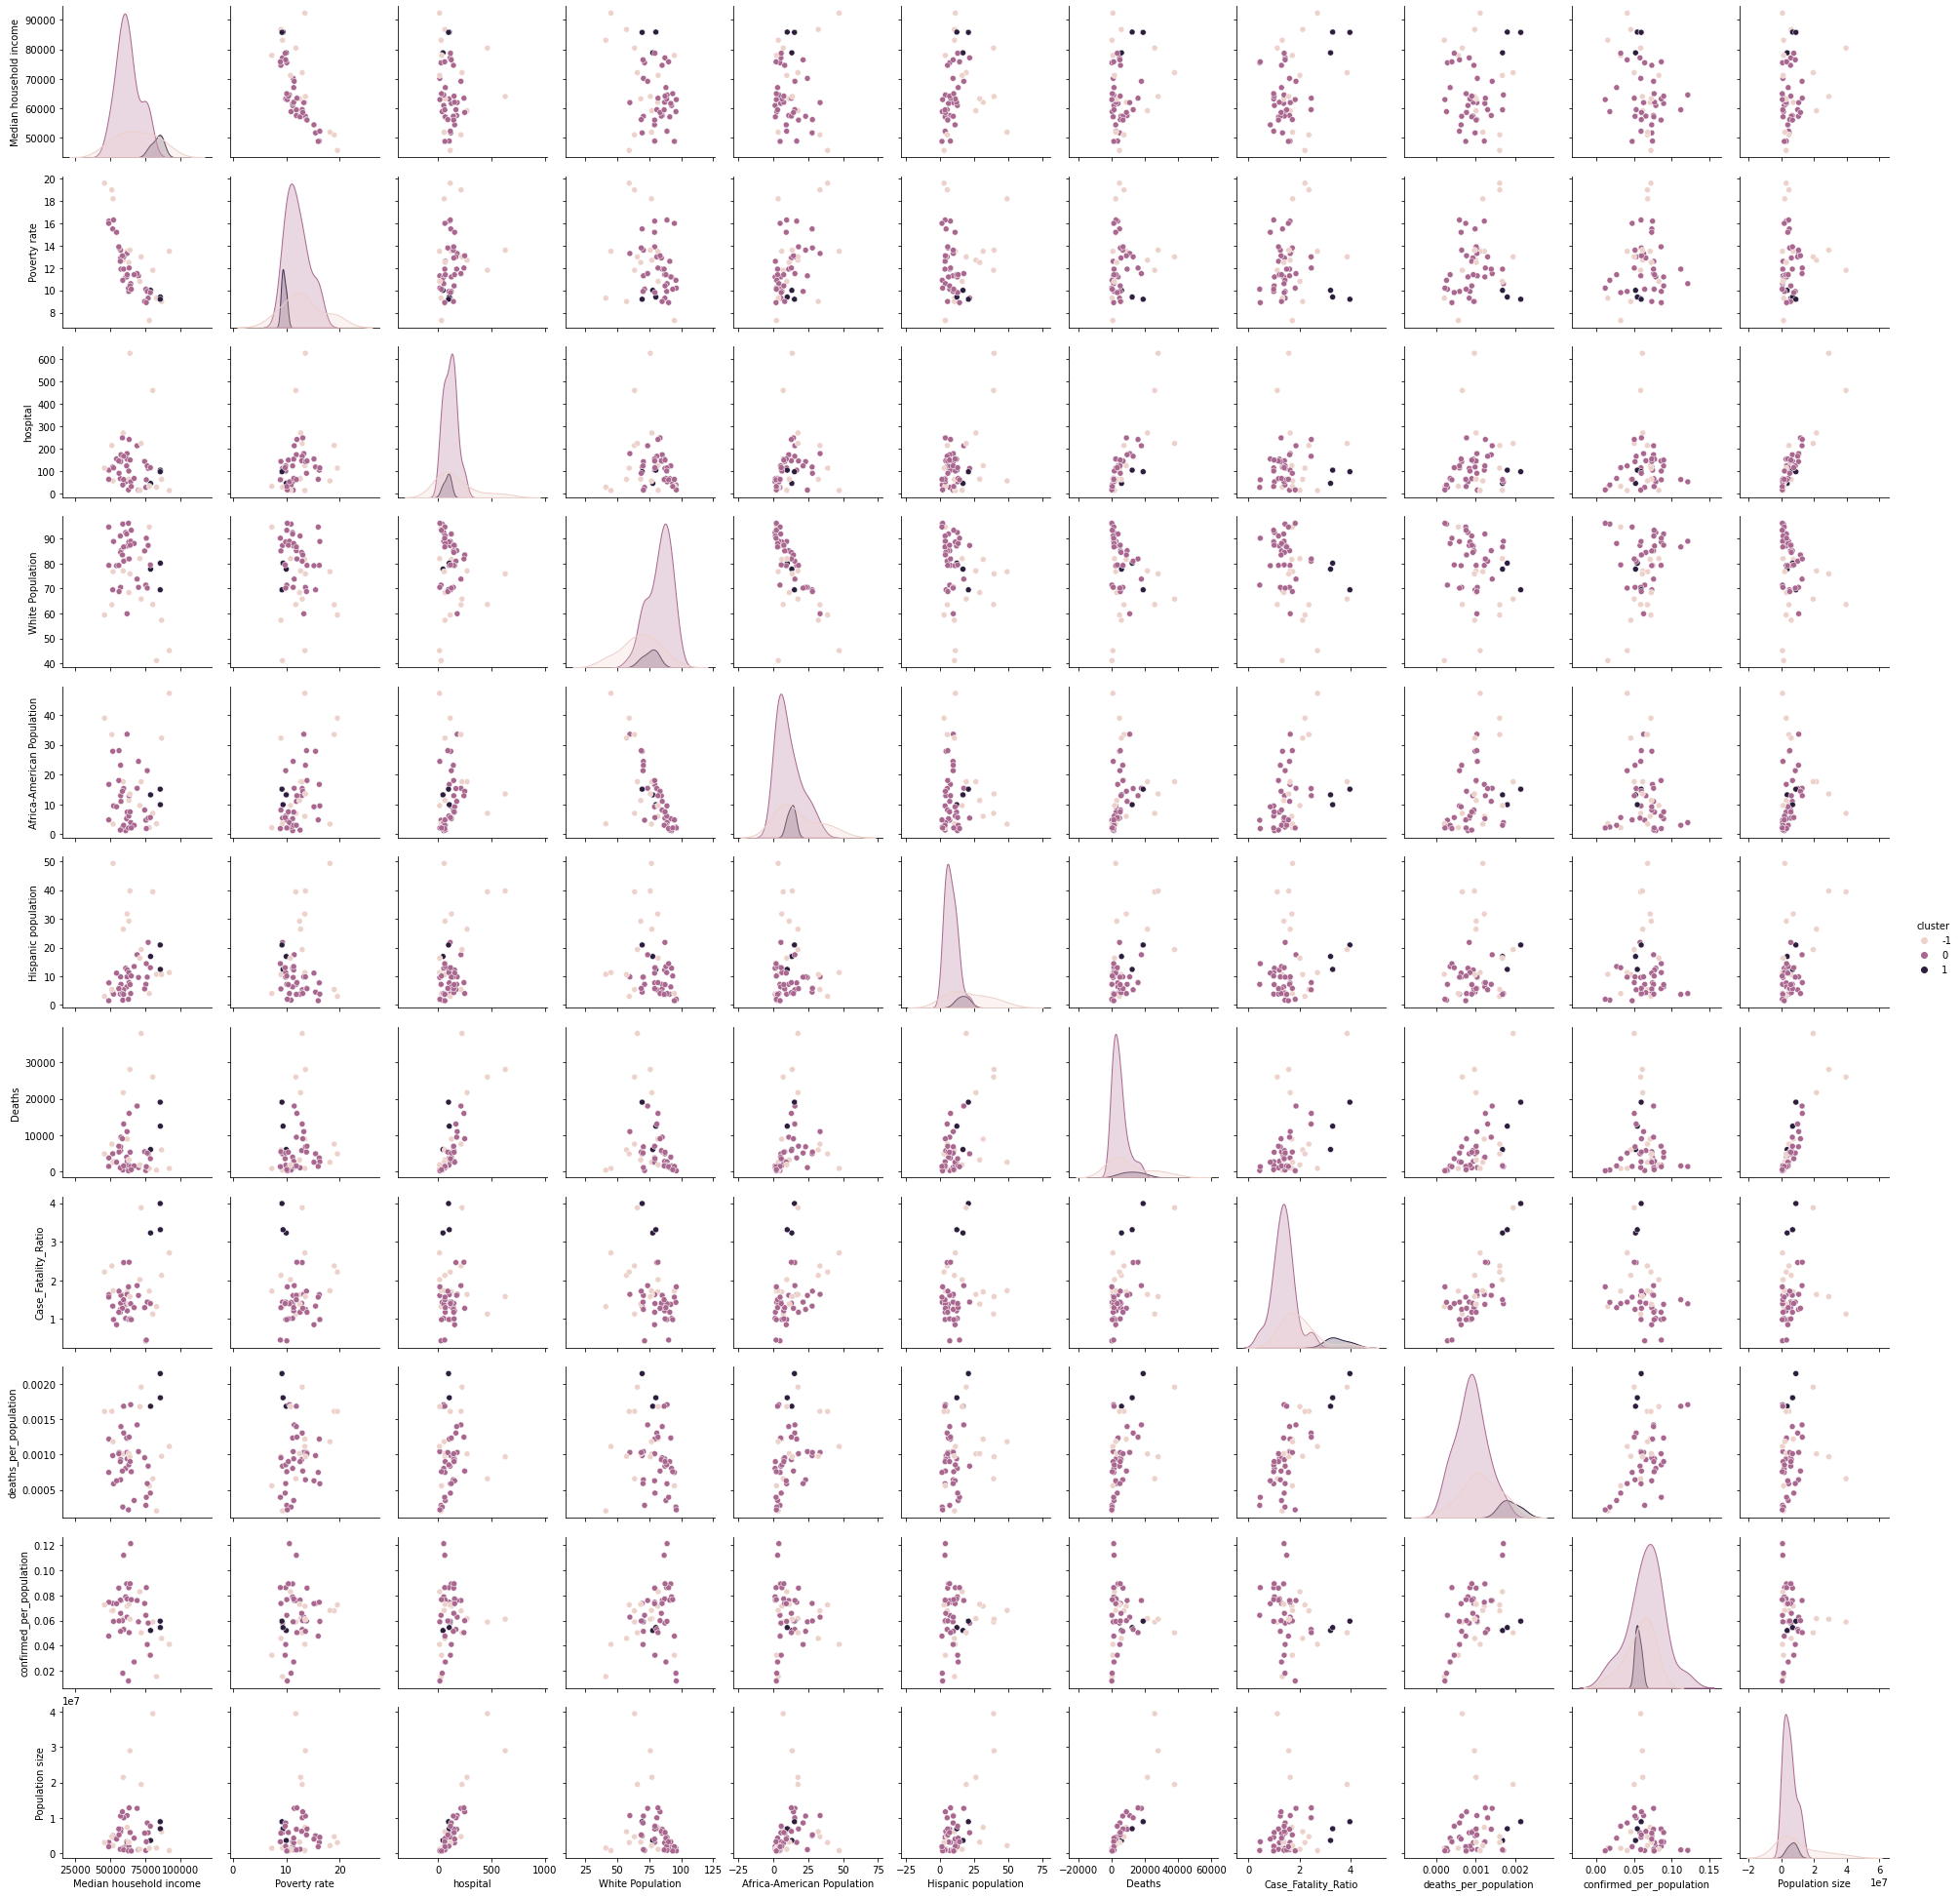

In [104]:
sns.pairplot(blah, hue='cluster');